<a href="https://colab.research.google.com/github/purplepatch-everyday/RecSys/blob/main/Movielens_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install wget

In [7]:
import wget
import zipfile
import os
import pandas as pd
from matplotlib import pyplot as pyplot

In [8]:
# Google colab mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Download data
# url = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
# wget.download(url,'/content/drive/MyDrive/data')


In [10]:
# Extract zipfile
# with zipfile.ZipFile("/content/drive/MyDrive/data/ml-latest-small.zip","r") as zip_ref:
#   zip_ref.extractall("/content/drive/MyDrive/data")

In [11]:
path = "/content/drive/MyDrive/data/ml-latest-small/"
os.listdir(path)

['movies.csv', 'README.txt', 'links.csv', 'ratings.csv', 'tags.csv']

In [12]:
# Read ratings.csv
ratings_df =pd.read_csv(os.path.join(path+'ratings.csv'),encoding='utf-8')
print(ratings_df.head())
print(ratings_df.shape)
print(list(ratings_df.columns))


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
(100836, 4)
['userId', 'movieId', 'rating', 'timestamp']


In [13]:
# Analyze ratings_df

# unique value of userId
print("unique userID:",len(ratings_df['userId'].unique()))
# unique value of movieId
print("unique movieID:",len(ratings_df['movieId'].unique()))
# average ratings
print("average movie ratings:", ratings_df["rating"].mean())
ratings_df.info()
ratings_df.describe()
ratings_df.isnull().sum()

unique userID: 610
unique movieID: 9724
average movie ratings: 3.501556983616962
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [14]:
# Read tags.csv
tags_df =pd.read_csv(os.path.join(path+'tags.csv'),encoding='utf-8')
print(tags_df.head())
print(tags_df.shape)
print(list(tags_df.columns))


   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200
(3683, 4)
['userId', 'movieId', 'tag', 'timestamp']


In [15]:
# Analyze tags_df

# unique value of userId
print("unique userID:",len(tags_df['userId'].unique()))
# unique value of movieId
print("unique movieID:",len(tags_df['movieId'].unique()))
# unique tags
print("unique tags:", len(tags_df["tag"].unique()))
tags_df.info()
tags_df.describe()
tags_df.isnull().sum()

unique userID: 58
unique movieID: 1572
unique tags: 1589
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [16]:
# Read movies.csv
movies_df=pd.read_csv(os.path.join(path + "movies.csv"),encoding="utf-8",index_col="movieId")
print(movies_df.head())
print(movies_df.shape)
print(list(movies_df.columns))

                                      title                                       genres
movieId                                                                                 
1                          Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
2                            Jumanji (1995)                   Adventure|Children|Fantasy
3                   Grumpier Old Men (1995)                               Comedy|Romance
4                  Waiting to Exhale (1995)                         Comedy|Drama|Romance
5        Father of the Bride Part II (1995)                                       Comedy
(9742, 2)
['title', 'genres']


In [17]:
# Analyze movies_df

movies_df.info()

movies_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 1 to 193609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9742 non-null   object
 1   genres  9742 non-null   object
dtypes: object(2)
memory usage: 228.3+ KB


title     0
genres    0
dtype: int64

In [18]:
# Create Dataframe
user_ratings_df = pd.DataFrame({
    'num of ratings': ratings_df.groupby('userId')['movieId'].count(),
    'average ratings': ratings_df.groupby('userId')['rating'].mean()
})
user_ratings_df.head()

,num of ratings,average ratings
userId,,
1,232,4.366379
2,29,3.948276
3,39,2.435897
4,216,3.555556
5,44,3.636364


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


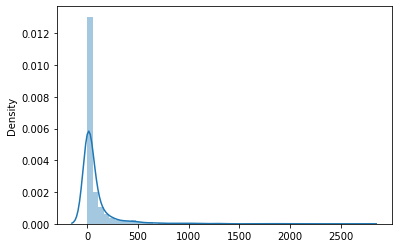

In [19]:
import seaborn as sns
sns.distplot(user_ratings_df.values)

In [42]:
import itertools
all_genres = [genre.split('|') for genre in movies_df['genres'].values]
genres = list(set(list(itertools.chain(*all_genres))))
print(len(all_genres))
print(len(genres))
print(genres)

9742
20
['Fantasy', 'Thriller', 'Film-Noir', 'IMAX', 'Adventure', 'Children', '(no genres listed)', 'Crime', 'Western', 'Comedy', 'Animation', 'War', 'Action', 'Documentary', 'Romance', 'Sci-Fi', 'Drama', 'Mystery', 'Musical', 'Horror']


In [32]:
genres_df = pd.DataFrame(columns=genres, index=movies_df.index)
genres_df.head()

,Fantasy,Thriller,Film-Noir,IMAX,Adventure,Children,(no genres listed),Crime,Western,Comedy,Animation,War,Action,Documentary,Romance,Sci-Fi,Drama,Mystery,Musical,Horror
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
print(movies_df.shape)
print(movies_df.head(10))

(9742, 2)
                                      title                                       genres
movieId                                                                                 
1                          Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
2                            Jumanji (1995)                   Adventure|Children|Fantasy
3                   Grumpier Old Men (1995)                               Comedy|Romance
4                  Waiting to Exhale (1995)                         Comedy|Drama|Romance
5        Father of the Bride Part II (1995)                                       Comedy
6                               Heat (1995)                        Action|Crime|Thriller
7                            Sabrina (1995)                               Comedy|Romance
8                       Tom and Huck (1995)                           Adventure|Children
9                       Sudden Death (1995)                                       Action
10         

In [34]:
for i, row in genres_df.iterrows():
    movie_id = row.name
    list_of_genres = movies_df.loc[movie_id]['genres'].split('|')

    genres_df.loc[movie_id][list_of_genres] = 1

In [35]:
print(genres_df.head())

        Fantasy Thriller Film-Noir IMAX  ... Drama Mystery Musical Horror
movieId                                  ...                             
1             1      NaN       NaN  NaN  ...   NaN     NaN     NaN    NaN
2             1      NaN       NaN  NaN  ...   NaN     NaN     NaN    NaN
3           NaN      NaN       NaN  NaN  ...   NaN     NaN     NaN    NaN
4           NaN      NaN       NaN  NaN  ...     1     NaN     NaN    NaN
5           NaN      NaN       NaN  NaN  ...   NaN     NaN     NaN    NaN

[5 rows x 20 columns]
